# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [11]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [12]:
# Defining the class names found from https://www.cs.toronto.edu/~kriz/cifar.html
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [13]:
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")


Number of classes: 100


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Print shapes and dimensions
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Print number of classes
num_classes = len(np.unique(y_train))
print("\nNumber of classes:", num_classes)

# Print data type and value range
print("\nData type:", x_train.dtype)
print("Min value:", x_train.min())
print("Max value:", x_train.max())

# Print image dimensions
print("\nImage dimensions:")
print("Height:", x_train.shape[1])
print("Width:", x_train.shape[2])
print("Color channels:", x_train.shape[3])

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Number of classes: 100

Data type: uint8
Min value: 0
Max value: 255

Image dimensions:
Height: 32
Width: 32
Color channels: 3


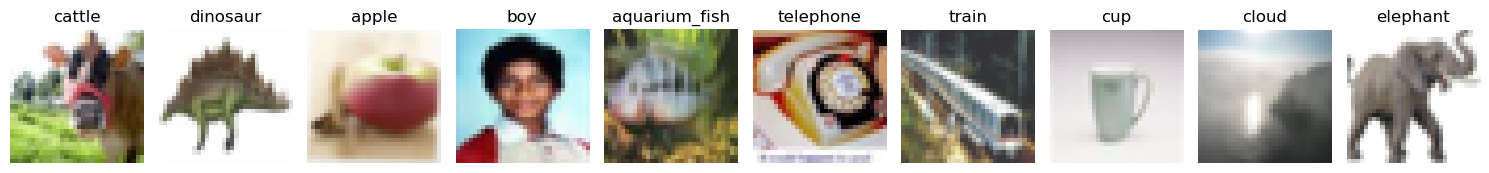

In [17]:
import matplotlib.pyplot as plt

# Define a helper function to visualize images
def plot_sample_images(images, labels, class_names, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot 10 sample images from the training set
plot_sample_images(x_train, y_train, class_names)


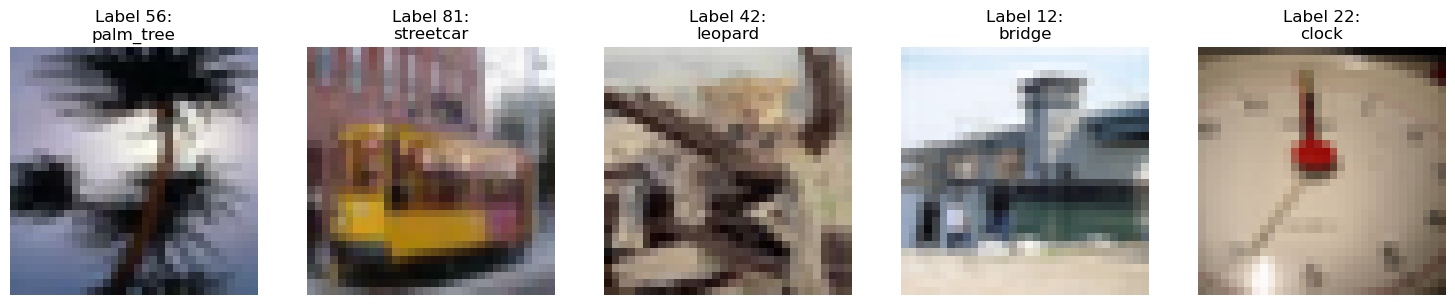

In [5]:
# Checking a few random images and their class names
import random

plt.figure(figsize=(15, 3))
for i in range(5):
    # Pick a random image
    idx = random.randint(0, len(x_train)-1)
    
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[idx])
    label_num = y_train[idx][0]
    plt.title(f"Label {label_num}:\n{class_names[label_num]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [18]:
# Normalize the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Normalized pixel values in training set: min={x_train.min()}, max={x_train.max()}")
print(f"Normalized pixel values in test set: min={x_test.min()}, max={x_test.max()}")


Normalized pixel values in training set: min=0.0, max=1.0
Normalized pixel values in test set: min=0.0, max=1.0


In [19]:
from keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

print(f"Shape of one-hot encoded training labels: {y_train.shape}")
print(f"Shape of one-hot encoded test labels: {y_test.shape}")


Shape of one-hot encoded training labels: (50000, 100)
Shape of one-hot encoded test labels: (10000, 100)


In [20]:
from sklearn.model_selection import train_test_split

# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Display the shapes of the resulting datasets
print(f"Training set shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Validation labels shape: {y_val.shape}")


Training set shape: (40000, 32, 32, 3), Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3), Validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    # First convolutional layer
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second convolutional layer
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Third convolutional layer
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully connected dense layers
    Dense(256, activation='relu'),
    Dense(100, activation='softmax')  # Output layer for 100 classes
])

# Compile the model
model.compile(
    optimizer='adam',  # Adaptive optimizer for faster convergence
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

# Display the model architecture
model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)       

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [23]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Suitable for multi-class classification
    optimizer='adam',  # Adaptive optimizer for faster convergence
    metrics=['accuracy']  # Track accuracy during training
)


Loss function: Categorical Crossentropy

 Categorical crossentropy is the standard loss function for multi-class classification problems which makes it great for the CIFAR-100 task because it helps the model learn to classify images into one of 100 categories. It compares the true labels (in a format where only the correct class is marked) with the model's predictions and adjusts to make the predictions closer to the correct label. It is penalizing incorrect predictions while rewarding confidence in the correct class.

Optimizer: Adam

Adam is a popular method for training neural networks because it automatically adjusts the learning rate as training progresses, saving time and effort in fine-tuning. It combines techniques to make learning faster and more stable, and it works well for many different tasks and datasets.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [24]:
# Train the model
history = model.fit(
    x_train, y_train,  # Training data
    batch_size=32,  # Batch size
    epochs=20,  # Number of epochs
    validation_data=(x_val, y_val),  # Validation data
    verbose=1  # Display training progress
)


Epoch 1/20
1250/1250 [==============================] - 74s 59ms/step - loss: 3.7525 - accuracy: 0.1280 - val_loss: 3.2115 - val_accuracy: 0.2168
Epoch 2/20
1250/1250 [==============================] - 80s 64ms/step - loss: 2.9393 - accuracy: 0.2715 - val_loss: 2.8349 - val_accuracy: 0.2920
Epoch 3/20
1250/1250 [==============================] - 74s 59ms/step - loss: 2.5432 - accuracy: 0.3492 - val_loss: 2.6607 - val_accuracy: 0.3361
Epoch 4/20
1250/1250 [==============================] - 76s 60ms/step - loss: 2.2512 - accuracy: 0.4127 - val_loss: 2.5360 - val_accuracy: 0.3637
Epoch 5/20
1250/1250 [==============================] - 69s 55ms/step - loss: 1.9958 - accuracy: 0.4696 - val_loss: 2.4908 - val_accuracy: 0.3830
Epoch 6/20
1250/1250 [==============================] - 73s 58ms/step - loss: 1.7722 - accuracy: 0.5183 - val_loss: 2.4967 - val_accuracy: 0.3848
Epoch 7/20
1250/1250 [==============================] - 77s 62ms/step - loss: 1.5495 - accuracy: 0.5734 - val_loss: 2.5167 -


We chose 20 epochs to start because it’s a good balance between giving the model enough time to learn patterns in the data without taking too long or overfitting. Training a model on a challenging dataset like CIFAR-100 requires multiple passes through the data to improve, but stopping at 20 epochs gives us a chance to check if the model is improving or struggling. This helps us see if the training process is on the right track before committing to longer runs.

Moreover, with 20 epochs, we can observe how the training and validation accuracy and loss behave over time. If the model’s validation performance improves steadily, we can decide to train for more epochs later. If it starts overfitting (when training performance improves but validation performance worsens), we’ll know it’s time to stop sooner. Starting with 20 epochs is a practical, manageable way to test and tune the model effectively.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [26]:
from sklearn.metrics import accuracy_score, precision_score

# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate precision (macro-average for multi-class)
test_precision = precision_score(y_test_classes, y_pred_classes, average='macro')

# Display metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (Macro-Averaged): {test_precision:.4f}")



313/313 [==============================] - 3s 9ms/step
Test Accuracy: 0.3479
Test Precision (Macro-Averaged): 0.3577


Accuracy: 34.79% 

Our model correctly classifies about 35% of all test images

Other metric: Precision (Macro-averaged)

Reason for selection: Precision is particularly useful for multi-class classification as it measures how accurate our positive predictions are for each class. The macro-average gives equal weight to each class, which is important since our dataset has the same number of images per class.


Value of metric: 35.77%

When the model predicts a specific class, it's right about 36% of the time.

Interpretation of metric value: The macro-averaged precision of 35.77% indicates that when our model predicts a specific class, it is correct about 36% of the time, averaged across all 100 classes. This is slightly higher than our accuracy, suggesting that when our model makes a positive prediction for a class, it's slightly more reliable than its overall accuracy would suggest.

The close values between accuracy and precision suggest consistent performance across classes.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

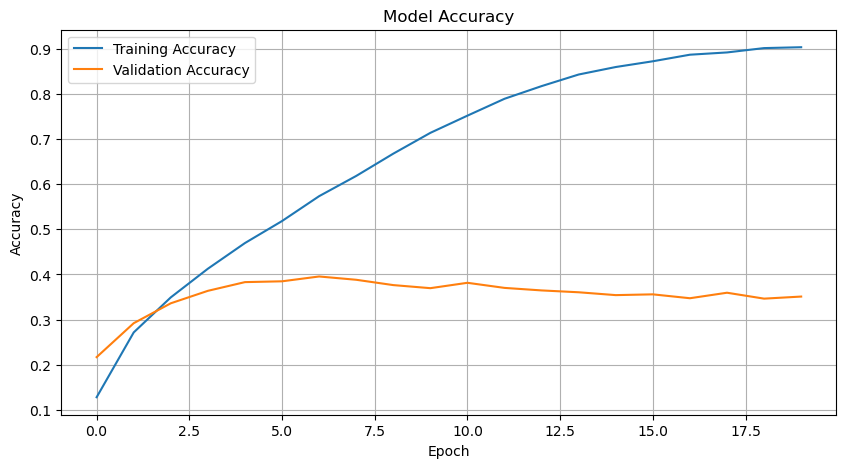

In [27]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


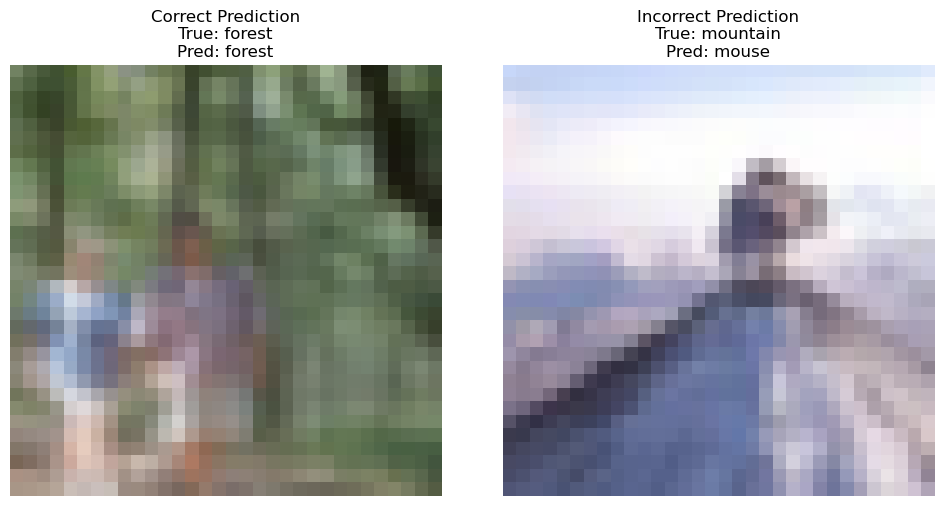

Probabilities for Correct Prediction:
True Class: forest
forest: 69.13%
willow_tree: 14.61%
kangaroo: 7.15%

Probabilities for Incorrect Prediction:
True Class: mountain
mouse: 45.63%
dolphin: 29.25%
seal: 9.38%


In [30]:
# Helper function to display top 3 class probabilities
def display_top_3_probs(y_pred, y_true, class_names):
    top_3 = np.argsort(y_pred)[-3:][::-1]
    print(f"True Class: {class_names[y_true]}")
    for idx in top_3:
        print(f"{class_names[idx]}: {y_pred[idx] * 100:.2f}%")

# Find a correct and incorrect prediction
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

# Plot the images
plt.figure(figsize=(10, 5))

# Correct prediction
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
true_class = class_names[y_test_classes[correct_idx]]  # Direct indexing
pred_class = class_names[y_pred_classes[correct_idx]]
plt.title(f'Correct Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

# Incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
true_class = class_names[y_test_classes[incorrect_idx]]  # Direct indexing
pred_class = class_names[y_pred_classes[incorrect_idx]]
plt.title(f'Incorrect Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display top-3 probabilities for each case
print("Probabilities for Correct Prediction:")
display_top_3_probs(y_pred[correct_idx], y_test_classes[correct_idx], class_names)

print("\nProbabilities for Incorrect Prediction:")
display_top_3_probs(y_pred[incorrect_idx], y_test_classes[incorrect_idx], class_names)




The model learns well during training, as shown by the steadily improving training accuracy, which reaches around 90%. However, the validation accuracy, which measures how well the model performs on unseen data, peaks at around 39% and then stagnates or declines. This suggests the model is starting to "memorize" the training data rather than learning general patterns that apply to new images - overfitting. This means the model struggles to generalize, especially given the complexity of the CIFAR-100 dataset with 100 diverse categories and small, low-resolution images.

When we look at specific predictions, the model performs well on some images, like recognizing a forest, with high confidence. However, it struggles with others, such as misclassifying a mountain as a mouse, assigning probabilities to unrelated categories like dolphin and seal. This shows the model sometimes focuses on surface-level features like texture or color instead of understanding the defining characteristics of the classes. While the model demonstrates potential, it needs improvements like regularization or better feature extraction to generalize better and handle such challenging tasks more effectively.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.


We chose data augmentation because it helps the model generalize better by artificially increasing the variety in the training data. Transformations like rotations, flips, and shifts expose the model to different perspectives of the same images, making it more robust to variations and reducing the risk of overfitting. This is especially useful for the CIFAR-100 dataset, where small, low-resolution images and visually similar classes make it easy for the model to memorize patterns instead of learning general features.

Data augmentation is simple to implement and computationally efficient, making it a practical solution. By introducing natural variations in the images, it helps the model focus on distinguishing key features, ultimately improving its ability to classify unseen data more accurately.

In [31]:
from keras.preprocessing.image import ImageDataGenerator

# Create a data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,          # Rotate images by up to 15 degrees
    width_shift_range=0.1,      # Shift images horizontally by up to 10%
    height_shift_range=0.1,     # Shift images vertically by up to 10%
    horizontal_flip=True        # Randomly flip images horizontally
)

# Fit the generator to the training data
datagen.fit(x_train)

# Define the augmented data generator for training
augmented_data = datagen.flow(x_train, y_train, batch_size=32)


Rotation Range: We chose to rotate the images by up to 15 degrees because it adds variety without making the images look unnatural. For example, a small tilt can simulate real-world scenarios, like when a photo is slightly tilted, but larger rotations might make the image unrecognizable.

Shift Range: We allowed the images to move (shift) a little horizontally or vertically, up to 10% of their size. This mimics real-life situations where objects in images might not always be perfectly centered, like a tree being slightly to the left or right. The small shift ensures the image still makes sense.

Horizontal Flip: We enabled flipping images left-to-right because some objects (like animals, landscapes, or vehicles) look the same whether they’re flipped or not. For example, a picture of a cat looks fine whether it’s facing left or right. This helps the model learn better without needing additional images.

In [32]:
# Train the model with augmented data
history = model.fit(
    augmented_data,  # Use the augmented data generator
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // 32,
    epochs=20,  # Keep the same number of epochs
    verbose=1
)



Epoch 1/20
1250/1250 [==============================] - 76s 61ms/step - loss: 2.6304 - accuracy: 0.3590 - val_loss: 2.6265 - val_accuracy: 0.3640
Epoch 2/20
1250/1250 [==============================] - 86s 69ms/step - loss: 2.2819 - accuracy: 0.4067 - val_loss: 2.4618 - val_accuracy: 0.3914
Epoch 3/20
1250/1250 [==============================] - 70s 56ms/step - loss: 2.1873 - accuracy: 0.4252 - val_loss: 2.5088 - val_accuracy: 0.3911
Epoch 4/20
1250/1250 [==============================] - 70s 56ms/step - loss: 2.1033 - accuracy: 0.4419 - val_loss: 2.4793 - val_accuracy: 0.3901
Epoch 5/20
1250/1250 [==============================] - 84s 67ms/step - loss: 2.0422 - accuracy: 0.4571 - val_loss: 2.4360 - val_accuracy: 0.3992
Epoch 6/20
1250/1250 [==============================] - 77s 62ms/step - loss: 1.9980 - accuracy: 0.4674 - val_loss: 2.3791 - val_accuracy: 0.4098
Epoch 7/20
1250/1250 [==============================] - 72s 57ms/step - loss: 1.9627 - accuracy: 0.4730 - val_loss: 2.3262 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [33]:
from sklearn.metrics import accuracy_score, precision_score

# Predict on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate metrics
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
test_precision = precision_score(y_test_classes, y_pred_classes, average='macro')

# Display results
print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")
print(f"Enhanced Model Test Precision (Macro-Averaged): {test_precision:.4f}")


313/313 [==============================] - 2s 5ms/step
Enhanced Model Test Accuracy: 0.4383
Enhanced Model Test Precision (Macro-Averaged): 0.4521


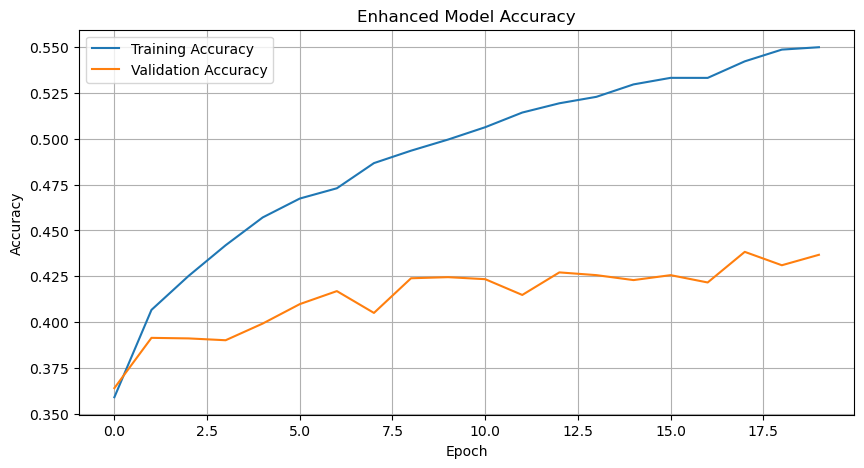

In [34]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Enhanced Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


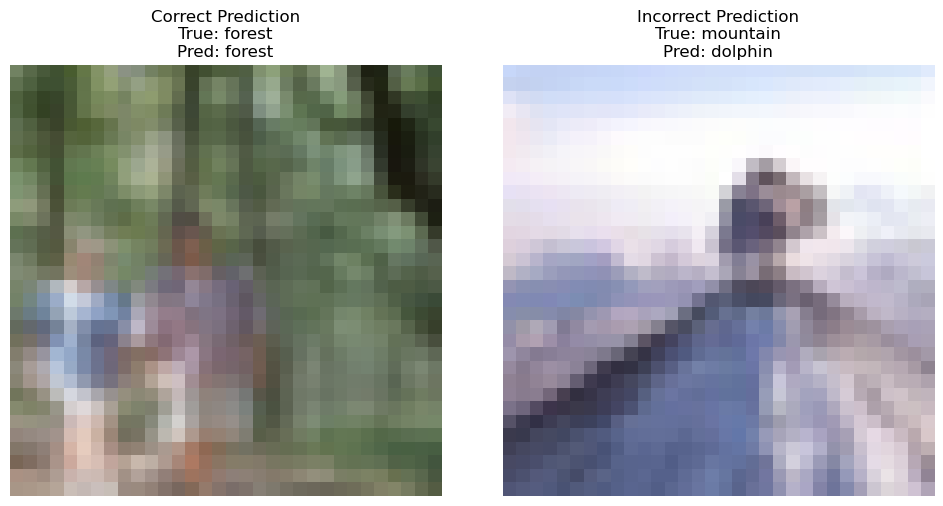

Probabilities for Correct Prediction:
True Class: forest
forest: 27.02%
leopard: 13.23%
pine_tree: 11.32%

Probabilities for Incorrect Prediction:
True Class: mountain
dolphin: 42.63%
bridge: 16.08%
worm: 10.40%


In [35]:
# Helper function to display top 3 class probabilities
def display_top_3_probs(y_pred, y_true, class_names):
    top_3 = np.argsort(y_pred)[-3:][::-1]
    print(f"True Class: {class_names[y_true]}")
    for idx in top_3:
        print(f"{class_names[idx]}: {y_pred[idx] * 100:.2f}%")

# Find a correct and incorrect prediction
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

# Plot the images
plt.figure(figsize=(10, 5))

# Correct prediction
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
true_class = class_names[y_test_classes[correct_idx]]
pred_class = class_names[y_pred_classes[correct_idx]]
plt.title(f'Correct Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

# Incorrect prediction
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
true_class = class_names[y_test_classes[incorrect_idx]]
pred_class = class_names[y_pred_classes[incorrect_idx]]
plt.title(f'Incorrect Prediction\nTrue: {true_class}\nPred: {pred_class}')
plt.axis('off')

plt.tight_layout()
plt.show()

# Display top-3 probabilities for each case
print("Probabilities for Correct Prediction:")
display_top_3_probs(y_pred[correct_idx], y_test_classes[correct_idx], class_names)

print("\nProbabilities for Incorrect Prediction:")
display_top_3_probs(y_pred[incorrect_idx], y_test_classes[incorrect_idx], class_names)


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Did the model's performance improve?
Yes, the enhanced model performed better, achieving a higher peak validation accuracy (43.83%) compared to the baseline (39.55%). It also demonstrated better test accuracy and reduced overfitting, as indicated by the narrowing gap between training and validation performance.

Why did this happen?
The improvement is primarily due to data augmentation, which exposed the model to a greater variety of training data. This made the model more robust to variations and helped it generalize better to unseen validation and test data.

Is there room for further improvement?
Yes, there is still room for improvement. The validation accuracy, while improved, is far from optimal. The model still struggles with certain classes, as seen in the incorrect predictions.

What other techniques could be tried?
- Transfer Learning: Using pretrained models like ResNet or EfficientNet could significantly enhance feature extraction.
- Regularization: Adding dropout or L2 regularization to further reduce overfitting.
- Hyperparameter Tuning: Optimizing the learning rate, batch size, and augmentation parameters could yield further improvements.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.